<a href="https://colab.research.google.com/github/subsup98/LineRegression-with-tensorflow/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8(%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code: linear regression in tensorflow 

Date: 2022/02/07 (version 1.0)

Comments: YongSub Lim(dydtjqdla98@kyonggi.ac.kr) from Smart MOM&DAD Lab

Description: 텐서플로우를 이용한 선형회귀모델 구축

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [ ]:
#선형회귀모델을 텐서플로우로 구현
#우선 데이터 값을 받아오기
from tensorflow.keras.datasets import boston_housing

In [ ]:
#텐서플로우랑 케라스 import 해주기
#데이터 전처리를 위해 pandas import 
import tensorflow as tf
import keras_preprocessing
import pandas as pd
import numpy as np
#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#한글 폰트설정
plt.rc('font',family='NanumBarunGothic')

In [ ]:
(train_X, train_Y), (test_X, test_Y)=tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz',test_split=0.2, seed=2022
)

In [ ]:
train_X

array([[1.39600e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.92690e+02, 1.23300e+01],
       [2.07162e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.70220e+02, 2.33400e+01],
       [4.83567e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.88220e+02, 1.14500e+01],
       ...,
       [2.49800e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.92040e+02, 2.13200e+01],
       [5.26930e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.82000e+02, 4.63000e+00],
       [1.30751e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.47600e+01]])

In [ ]:
train_Y

array([20.1, 11.9, 20.6, 33.2, 20.8, 13.5, 24.7, 13.9, 10.4, 19.7, 21.4,
       20.3, 18.5, 12.7, 22. , 36.2,  7.4, 16.3, 23.3, 17.5, 21.5, 19.5,
        8.8, 31.5, 50. , 50. , 23.7, 22.5, 18. , 27.9, 21.7, 28.6, 20. ,
       17.5,  8.3, 12.1, 13.8, 27.1, 14.9, 21.9,  8.3, 15.1, 20.4,  8.5,
       14.1, 37.9, 16.2, 13.9, 12.5, 15. , 22.3, 11.3, 32.2, 28.2, 23.8,
       15.3, 24.3, 25. , 27.5, 19.4, 16.1, 27.5, 13.1, 30.1, 27.1, 18.9,
       32.9, 21.2, 36.2, 18.1, 10.2, 23.1,  7.5, 20.1, 23.3, 14.4,  8.1,
       10.2,  6.3, 29. , 16.2, 22. , 20.5, 22.8, 23.2,  9.7, 26.6, 27.9,
        7.2, 36.5, 22.1, 25. , 23.9, 13.2, 16.7, 22. , 22.8, 19.4, 13.8,
       23. , 33.1, 11.7, 44. , 22.3, 23.1, 17.4, 48.3, 29.1,  7. , 37.3,
       14.1,  9.5,  5. , 20.6, 31.1, 24.1, 25. , 21.5, 20.6, 29. , 39.8,
       23.3, 25.1, 22.9, 26.5, 19.6,  8.7, 23.1, 13.4, 14.9, 19.1, 14. ,
       21.1, 22.6, 25. , 42.3, 25. ,  8.4, 29.9,  9.6, 35.2, 46.7, 33.1,
       18.9,  7.2, 29.8, 17.5,  8.4, 15.2, 18.5, 18

In [ ]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

In [ ]:
print(train_X[2]) 
print(train_Y[1])

[ 0.11259723 -0.48226658  1.02629501 -0.26761547  0.23572214 -0.53354199
 -0.52069998 -0.28548767  1.62474056  1.50952915  0.78685139  0.36767029
 -0.16823505]
-1.1475786082128712


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1)# y 값이 1개 나오게만들기 위해서
])#dence는 레이어 층의 갯수 1번째 레이어에 100개의 층 2번째 50개 3번째 25 4번째 1개

In [ ]:
model.compile(optimizer='sgd', loss='mse')#metrics=['accuracy']) #경사하강법 사용 lr = 0.01 손실함수 mse

In [ ]:
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25,verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.1469 - val_loss: 0.1279
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1793 - val_loss: 0.1163
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1654 - val_loss: 0.1135
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1634 - val_loss: 0.1150
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1670 - val_loss: 0.1215
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1664 - val_loss: 0.1127
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1582 - val_loss: 0.1244
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1589 - val_loss: 0.1166
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2187 - val_loss: 0.1334
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1415 - val_loss: 0.1206
Epoch 11

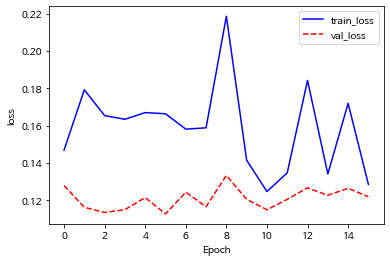

In [ ]:
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1320


0.13203130662441254

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


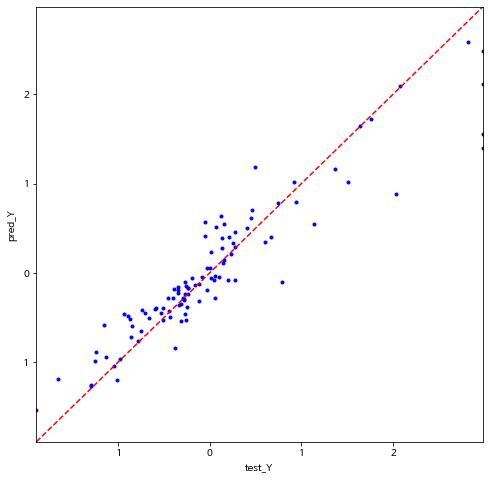

In [ ]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8, 8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c="red")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()